In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
df = pd.read_csv("C:\\Users\\lohit\\Downloads\\dataset.csv")
df

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
1217,Import Loaded on Rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel


In [71]:
df.describe()

,externalStatus,internalStatus
count,1222,1222
unique,108,15
top,Gate out,Loaded on Vessel
freq,144,331


In [72]:
df.isna().sum().sum()

0

In [73]:
df.isnull().sum()

externalStatus    0
internalStatus    0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   externalStatus  1222 non-null   object
 1   internalStatus  1222 non-null   object
dtypes: object(2)
memory usage: 19.2+ KB


In [75]:

print(df.head())


                                      externalStatus    internalStatus
0                                           PORT OUT          Port Out
1                                        TERMINAL IN  Inbound Terminal
2                                            PORT IN           Port In
3  Vessel departure from first POL (Vessel name :...         Departure
4  Vessel arrival at final POD (Vessel name : TIA...           Arrival


In [76]:

# Convert external status and internal status columns to categorical data type
df['externalStatus'] = df['externalStatus'].astype('category')
df['internalStatus'] = df['internalStatus'].astype('category')


In [77]:

# Get the unique values of external status and internal status
external_status_values = df['externalStatus'].cat.categories.tolist()
internal_status_values = df['internalStatus'].cat.categories.tolist()


In [78]:
from sklearn.preprocessing import LabelEncoder
# Replace the external status and internal status values with numerical labels
label_encoder = LabelEncoder()
df['externalStatus'] = label_encoder.fit_transform(df['externalStatus'])
df['internalStatus'] = label_encoder.fit_transform(df['internalStatus'])

# Preview the dataset after encoding
print(df.head())

# Save the encoded dataset to a new CSV file
df.to_csv('encoded_dataset.csv', index=False)

   externalStatus  internalStatus
0              92              13
1              94               7
2              91              12
3             107               1
4             106               0


In [79]:
from sklearn.model_selection import train_test_split
X = df[["externalStatus"]]
y = df["internalStatus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Get the unique values of the target variable
unique_values = df["internalStatus"].unique()

# Define the number of classes based on the unique values
num_classes = len(unique_values)

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 15


In [81]:


# Define the input shape
input_shape = (1,)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 15)                  │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 847 (3.31 KB)

 Trainable params: 847 (3.31 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
X = df.drop('internalStatus', axis=1)
y = df['internalStatus']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Convert the predicted values to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average="weighted")
recall = recall_score(y_test, y_pred_labels, average="weighted")
confusion_mtx = confusion_matrix(y_test, y_pred_labels)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))



Epoch 1/50


C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1714 - loss: 4.3129 - val_accuracy: 0.2204 - val_loss: 3.3051
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3089 - loss: 2.7788 - val_accuracy: 0.2204 - val_loss: 2.6671
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3260 - loss: 2.4002 - val_accuracy: 0.2735 - val_loss: 2.4837
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3858 - loss: 2.3093 - val_accuracy: 0.4204 - val_loss: 2.4471
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 2.2666 - val_accuracy: 0.4286 - val_loss: 2.3553
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 2.2065 - val_accuracy: 0.4286 - val_loss: 2.3267
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4668 - loss: 2.1705 - val_accuracy: 0.4286 - val_loss: 2.2631
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4619 - loss: 2.1315 - val_accuracy: 0.4286 - val_loss: 2.2330
E

C:\Users\lohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


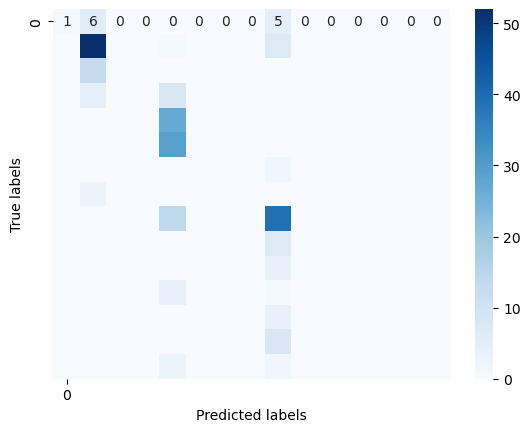

In [85]:
# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', xticklabels=num_classes, yticklabels=num_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [88]:
pip install fastapi


Note: you may need to restart the kernel to use updated packages.


In [89]:
from fastapi import FastAPI
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

app = FastAPI()

# Load the preprocessed dataset
df = pd.read_csv('encoded_dataset.csv')

# Load the trained model and label encoder
model = joblib.load('trained_model.joblib')
le = joblib.load('label_encoder.joblib')

@app.post("/predict")
async def predict(data: dict):
    # Convert input data to DataFrame
    df_input = pd.DataFrame([data['external_status']], columns=['external_status'])

    # Preprocess input data
    df_input['external_status'] = le.transform(df_input['external_status'])

    # Make prediction
    prediction = model.predict(df_input)

    # Convert predicted label to original label
    predicted_label = le.inverse_transform(prediction)[0]

    return {'predicted_label': predicted_label}

FileNotFoundError: [Errno 2] No such file or directory: 'trained_model.joblib'